In [1]:
import seaborn as sns
from pollinator_model import PollinatorModel

processing
death by poison
death by poison
death by poison
death by poison
death by poison
death by poison
death by poison
death by poison
death by poison
death by poison
death by poison
death by poison
death by poison
death by poison
death by poison
death by poison
death by poison
death by poison
death by poison
death by poison
death by poison
death by poison
death by poison
death by poison
death by poison
death by poison
death by poison
death by poison
death by poison
death by poison
death by poison
death by poison
death by poison
death by poison
death by poison
death by poison
death by poison
death by poison
death by poison
death by poison
death by poison
death by poison
death by poison
death by poison
death by poison
death by poison
death by poison
death by poison
death by poison
death by poison
death by poison
     Total Pollinators  Average Bee Health  Contaminated Bees
0                  100             5.00000                  0
1                  100             5.00000       

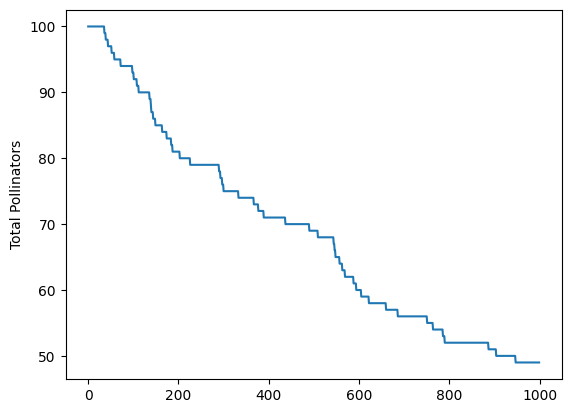

In [2]:
print('processing')
model = PollinatorModel(bee_type='bumblebee', width=500, height=500, pesticide_ratio=0.7)
for _ in range(1000):
    model.step()
data = model.datacollector.get_model_vars_dataframe()
print(data)
g = sns.lineplot(data=data['Total Pollinators'])